In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

In [2]:
f = lambda x,y: x**2 - y**2

In [3]:
xs = np.linspace(-3,3,1000)

In [15]:
zs_wrt_x = f(xs, 0)

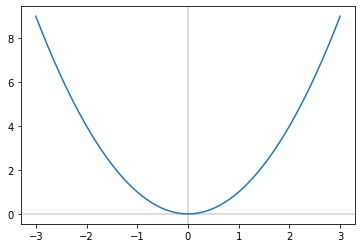

In [16]:
fig,ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(xs, zs_wrt_x)

In [17]:
delz_delx = lambda x,y: 2*x

In [18]:
x_samples = [-2,-1,0,1,2]
colors = ['red','orange','green','blue','purple']

In [19]:
def point_and_tangent_wrt_x(xs,x,y,f,fprime,col):
    z = f(x,y)
    plt.scatter(x,z,c=col)
    
    tangent_m = fprime(x,y)
    tangent_b = z - tangent_m*x
    tangent_line = tangent_m*xs + tangent_b
    
    plt.plot(xs, tangent_line, c=col, linestyle='dashed', linewidth=0.7)
    
    

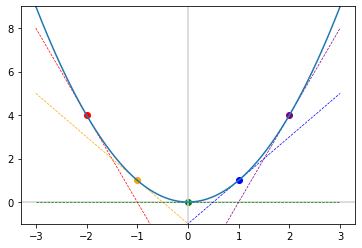

In [20]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i,x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])
    
plt.ylim(-1,9)
_ = ax.plot(xs, zs_wrt_x)

In [31]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [32]:
r = torch.tensor(3.).requires_grad_(); r

tensor(3., requires_grad=True)

In [33]:
l = torch.tensor(5.).requires_grad_(); l

tensor(5., requires_grad=True)

In [34]:
v = cylinder_vol(r,l); v

tensor(141.3717, grad_fn=<MulBackward0>)

In [35]:
v.backward()

In [36]:
# if we increase length by l, at radius that is going to
# increase volume of cylinder by 28.3
l.grad

tensor(28.2743)

In [37]:
# A change in radius r (by a small amt) corresponds to 
# a change in volumne by 2pi r l

In [38]:
r.grad # dv/dr

tensor(94.2478)

In [40]:
2 * math.pi * 3 * 5

94.24777960769379

In [41]:
delta = 1e-6; delta

1e-06